# Introduction

### The Client

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

### Project delivery:

We have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using our actionable insights to help them identify the right company to make their investment.

The outcome of our delivery will be a presentation to XYZ’s Executive team. This presentation will be judged based on the visuals provided, the quality of our analysis and the value of our recommendations and insights. 

### Data Set:

We have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

**Cab_Data.csv** _ – this file includes details of transaction for 2 cab companies

**Customer_ID.csv** – this is a mapping table that contains a unique identifier which links the customer’s demographic details

**Transaction_ID.csv** – this is a mapping table that contains transaction to customer mapping and payment mode

**City.csv** – this file contains list of US cities, their population and number of cab users

# 📌 1️⃣ Data Understanding

In this section, we explored the four provided datasets to understand their structure, check for missing or duplicate records, and correct data types where necessary. We then merged the datasets into a single master dataset to enable holistic analysis.

---


In [2]:
# Import Libraries
# =======================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Show plots inline
%matplotlib inline

# For date parsing
from datetime import datetime

In [3]:
#Load Datasets
# =======================================
cab_data = pd.read_csv('Cab_Data.csv')
customer_data = pd.read_csv('Customer_ID.csv')
transaction_data = pd.read_csv('Transaction_ID.csv')
city_data = pd.read_csv('City.csv')

print("✅ Files Loaded!")

✅ Files Loaded!


In [4]:
#  Preview Data
# =======================================
print("\nCab Data:\n", cab_data.head())
print("\nCustomer Data:\n", customer_data.head())
print("\nTransaction Data:\n", transaction_data.head())
print("\nCity Data:\n", city_data.head())



Cab Data:
    Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  

Customer Data:
    Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536

Transaction Data:
    Transaction ID  Customer ID P

In [5]:
#  Check for Missing Values
# =======================================
print("\nMissing Values in Cab Data:\n", cab_data.isnull().sum())
print("\nMissing Values in Customer Data:\n", customer_data.isnull().sum())
print("\nMissing Values in Transaction Data:\n", transaction_data.isnull().sum())
print("\nMissing Values in City Data:\n", city_data.isnull().sum())


Missing Values in Cab Data:
 Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

Missing Values in Customer Data:
 Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

Missing Values in Transaction Data:
 Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

Missing Values in City Data:
 City          0
Population    0
Users         0
dtype: int64


In [6]:
#  Remove Duplicates if Any
# =======================================
cab_data.drop_duplicates(inplace=True)
customer_data.drop_duplicates(subset='Customer ID', inplace=True)
transaction_data.drop_duplicates(subset='Transaction ID', inplace=True)
city_data.drop_duplicates(subset='City', inplace=True)

print("\n✅ Duplicates Removed!")



✅ Duplicates Removed!


In [7]:
print("\nData type in Cab Data:\n", cab_data.info())
print("\nData type in Customer Data:\n", customer_data.info())
print("\nData type in Transaction Data:\n", transaction_data.info())
print("\nData type in City Data:\n", city_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB

Data type in Cab Data:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-

In [8]:
# =======================================
# ✅ Correct Excel Date Conversion
# =======================================

# Suppose your DataFrame is called cab_data
cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'], origin='1899-12-30', unit='D')

# Verify conversion
print(cab_data[['Transaction ID', 'Date of Travel']].head())


   Transaction ID Date of Travel
0        10000011     2016-01-08
1        10000012     2016-01-06
2        10000013     2016-01-02
3        10000014     2016-01-07
4        10000015     2016-01-03


In [9]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [10]:
#  Merge DataFrames to Create Master
# =======================================
merged = pd.merge(cab_data, transaction_data, on='Transaction ID', how='left')
merged = pd.merge(merged, customer_data, on='Customer ID', how='left')
merged = pd.merge(merged, city_data, on='City', how='left')

print("✅ Merged Master DataFrame:")
print(merged)





✅ Merged Master DataFrame:
        Transaction ID Date of Travel     Company           City  \
0             10000011     2016-01-08    Pink Cab     ATLANTA GA   
1             10000012     2016-01-06    Pink Cab     ATLANTA GA   
2             10000013     2016-01-02    Pink Cab     ATLANTA GA   
3             10000014     2016-01-07    Pink Cab     ATLANTA GA   
4             10000015     2016-01-03    Pink Cab     ATLANTA GA   
...                ...            ...         ...            ...   
359387        10440101     2018-01-08  Yellow Cab  WASHINGTON DC   
359388        10440104     2018-01-04  Yellow Cab  WASHINGTON DC   
359389        10440105     2018-01-05  Yellow Cab  WASHINGTON DC   
359390        10440106     2018-01-05  Yellow Cab  WASHINGTON DC   
359391        10440107     2018-01-02  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  Customer ID Payment_Mode  \
0              30.45         370.95      313.6350        29290         Card  

### Profit margin

In [11]:

#  Add Profit Margin Column
# =======================================
merged['Profit'] = merged['Price Charged'] - merged['Cost of Trip']
merged['Margin %'] = (merged['Profit'] / merged['Price Charged']) * 100

print("\nProfit Stats:\n", merged[['Profit', 'Margin %']].describe())




Profit Stats:
               Profit       Margin %
count  359392.000000  359392.000000
mean      137.253198      27.128413
std       160.311840      18.550100
min      -220.060000     -69.301505
25%        28.012000      13.855876
50%        81.962000      26.430302
75%       190.030000      41.611989
max      1463.966000      76.202636


In [12]:
merged.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,Margin %
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,"814,885","24,701",57.315,15.450869
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,"814,885","24,701",23.666,6.601026
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,"814,885","24,701",27.568,22.019169
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,"814,885","24,701",25.798,6.835718
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,"814,885","24,701",16.844,14.695516


In [13]:
# Remove commas and convert to integer
merged['Population'] = merged['Population'].str.replace(',', '').astype(int)
merged['Users'] = merged['Users'].str.replace(',', '').astype(int)

print(merged[['City', 'Population', 'Users']].drop_duplicates().head())


          City  Population   Users
0   ATLANTA GA      814885   24701
6    AUSTIN TX      698371   14978
8    BOSTON MA      248968   80021
23  CHICAGO IL     1955130  164468
53   DALLAS TX      942908   22157


### Basic Descriptive Stats

In [14]:
print(merged.describe(include='all'))


        Transaction ID                 Date of Travel     Company  \
count     3.593920e+05                         359392      359392   
unique             NaN                            NaN           2   
top                NaN                            NaN  Yellow Cab   
freq               NaN                            NaN      274681   
mean      1.022076e+07  2017-08-17 01:37:55.042293760         NaN   
min       1.000001e+07            2016-01-02 00:00:00         NaN   
25%       1.011081e+07            2016-11-23 00:00:00         NaN   
50%       1.022104e+07            2017-09-10 00:00:00         NaN   
75%       1.033094e+07            2018-05-12 00:00:00         NaN   
max       1.044011e+07            2018-12-31 00:00:00         NaN   
std       1.268058e+05                            NaN         NaN   

               City   KM Travelled  Price Charged   Cost of Trip  \
count        359392  359392.000000  359392.000000  359392.000000   
unique           19            NaN 

# 📌 2️⃣ Profit Analysis

Here, we calculated the total profit and profit per kilometer for both cab companies. This helps us compare overall profitability and operational efficiency, which is a key factor for XYZ’s investment decision.

---


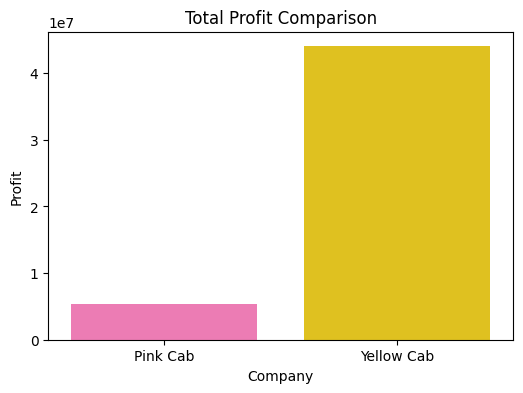

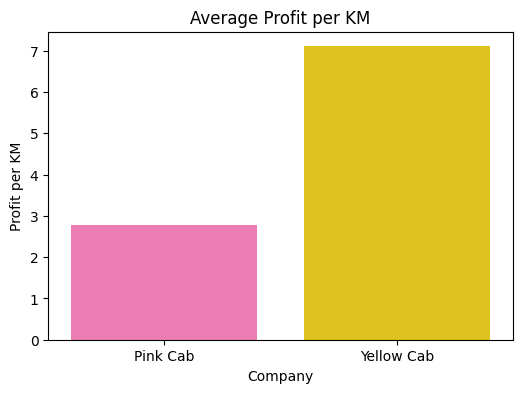

In [15]:
# ✅ Overall profit comparison 
company_profit = merged.groupby('Company')['Profit'].sum().reset_index()

plt.figure(figsize=(6, 4))  # 👈 Smaller figure size
sns.barplot(
    data=company_profit,
    x='Company',
    y='Profit',
    hue='Company',
    palette={'Pink Cab': '#FF69B4', 'Yellow Cab': '#FFD700'},
    legend=False
)
plt.title('Total Profit Comparison')
plt.show()

# ✅ Profit per KM 
merged['Profit per KM'] = merged['Profit'] / merged['KM Travelled']
ppkm = merged.groupby('Company')['Profit per KM'].mean().reset_index()

plt.figure(figsize=(6, 4))  # 👈 Smaller figure size
sns.barplot(
    data=ppkm,
    x='Company',
    y='Profit per KM',
    hue='Company',
    palette={'Pink Cab': '#FF69B4', 'Yellow Cab': '#FFD700'},
    legend=False
)
plt.title('Average Profit per KM')
plt.show()


# 📌 3️⃣ Yearly Profit & Ride Analysis

We analyzed yearly trends in profit and the total number of rides for both companies. This reveals whether either company is showing consistent growth or decline over time, highlighting long-term sustainability and market trends.

---


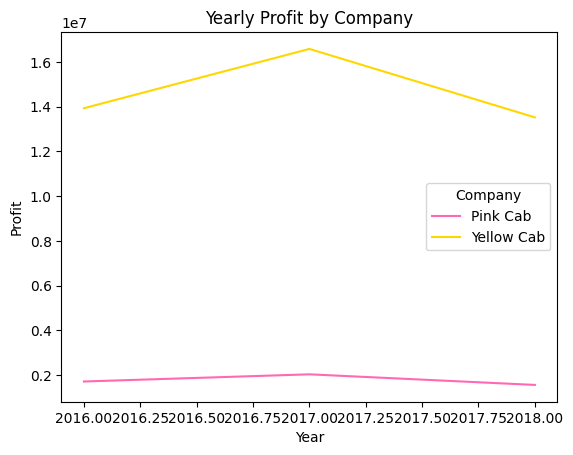

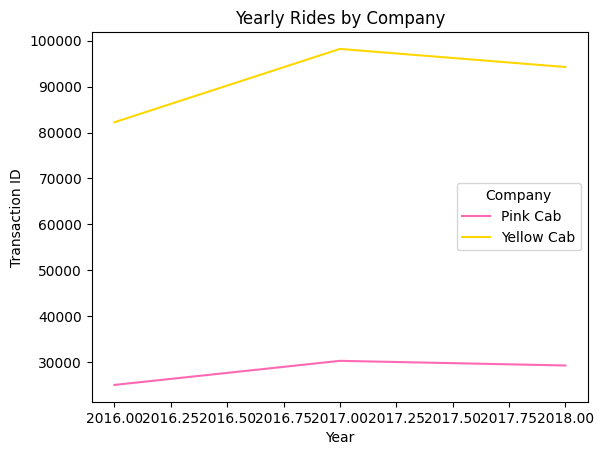

In [16]:
merged['Year'] = merged['Date of Travel'].dt.year

# Yearly profit
year_profit = merged.groupby(['Year', 'Company'])['Profit'].sum().reset_index()
sns.lineplot(data=year_profit, x='Year', y='Profit', hue='Company',
             palette={'Pink Cab': '#FF69B4', 'Yellow Cab': '#FFD700'})
plt.title('Yearly Profit by Company')
plt.show()

# Yearly rides
year_rides = merged.groupby(['Year', 'Company'])['Transaction ID'].count().reset_index()
sns.lineplot(data=year_rides, x='Year', y='Transaction ID', hue='Company',
             palette={'Pink Cab': '#FF69B4', 'Yellow Cab': '#FFD700'})
plt.title('Yearly Rides by Company')
plt.show()


# 📌 4️⃣ Customer Segmentation: Gender, Age, Income

Understanding the customer profile is critical. We segmented customers by gender, age group, and income class to see which demographics each company attracts most. This insight supports better marketing and positioning strategies.

---


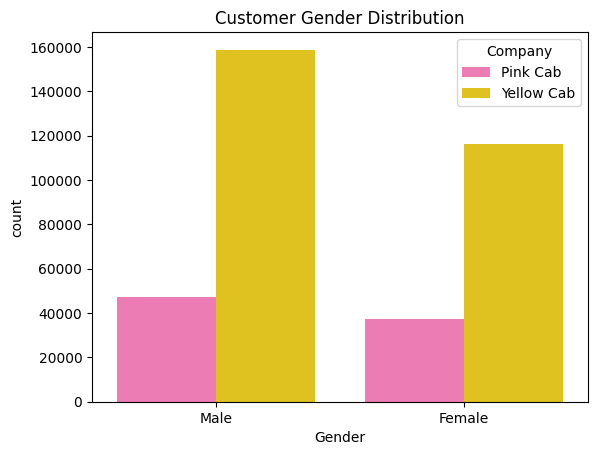

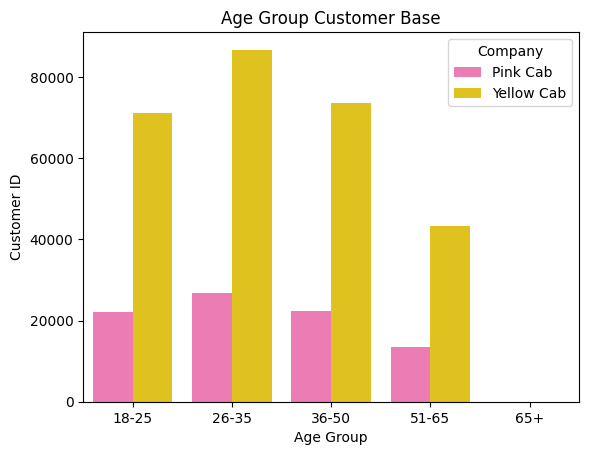

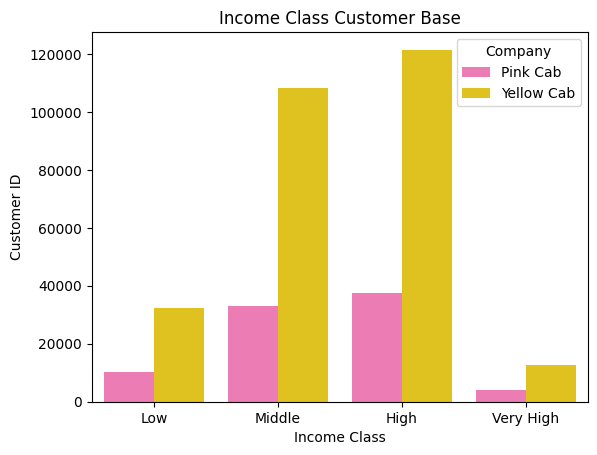

In [17]:
# Gender
sns.countplot(data=merged, x='Gender', hue='Company', palette={'Pink Cab': '#FF69B4', 'Yellow Cab': '#FFD700'})
plt.title('Customer Gender Distribution')
plt.show()

# Age Group
merged['Age Group'] = pd.cut(merged['Age'],
                             bins=[0, 25, 35, 50, 65, 100],
                             labels=['18-25', '26-35', '36-50', '51-65', '65+'])

age_group = merged.groupby(['Age Group', 'Company'],observed=True)['Customer ID'].count().reset_index()
sns.barplot(data=age_group, x='Age Group', y='Customer ID', hue='Company',
            palette={'Pink Cab': '#FF69B4', 'Yellow Cab': '#FFD700'})
plt.title('Age Group Customer Base')
plt.show()

# Income Class
merged['Income Class'] = pd.cut(merged['Income (USD/Month)'],
                                bins=[0, 5000, 15000, 30000, 50000],
                                labels=['Low', 'Middle', 'High', 'Very High'])

income_group = merged.groupby(['Income Class', 'Company'],observed=True)['Customer ID'].count().reset_index()
sns.barplot(data=income_group, x='Income Class', y='Customer ID', hue='Company',
            palette={'Pink Cab': '#FF69B4', 'Yellow Cab': '#FFD700'})
plt.title('Income Class Customer Base')
plt.show()


# 📌 5️⃣ Customer Retention

We examined repeat customer behavior to assess loyalty. Customers who take multiple rides with the same company indicate strong retention, which contributes to predictable revenue and lower customer acquisition costs.

---


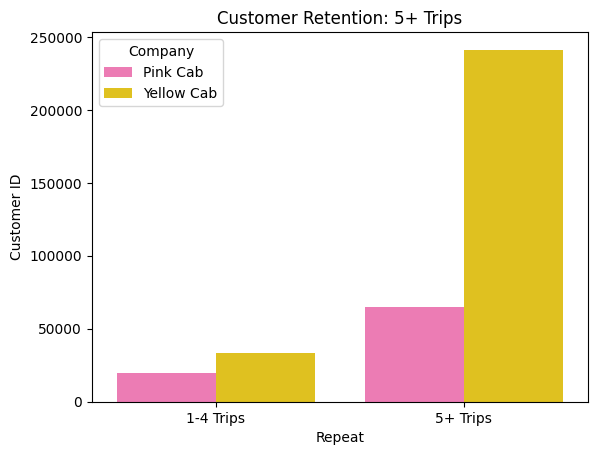

In [18]:
# Same repeat customer block
customer_trips = merged.groupby('Customer ID')['Transaction ID'].count().reset_index()
customer_trips['Repeat'] = customer_trips['Transaction ID'].apply(lambda x: '5+ Trips' if x >= 5 else '1-4 Trips')

merged = pd.merge(merged, customer_trips[['Customer ID', 'Repeat']], on='Customer ID', how='left')

repeat_seg = merged.groupby(['Repeat', 'Company'])['Customer ID'].count().reset_index()
sns.barplot(data=repeat_seg, x='Repeat', y='Customer ID', hue='Company',
            palette={'Pink Cab': '#FF69B4', 'Yellow Cab': '#FFD700'})
plt.title('Customer Retention: 5+ Trips')
plt.show()


# 📌 6️⃣ City-Wise Reach

This section compares each company’s reach within cities. We calculated the percentage of total cab users covered by each company in major cities. This helps identify geographic strengths, local competition, and growth opportunities.

---


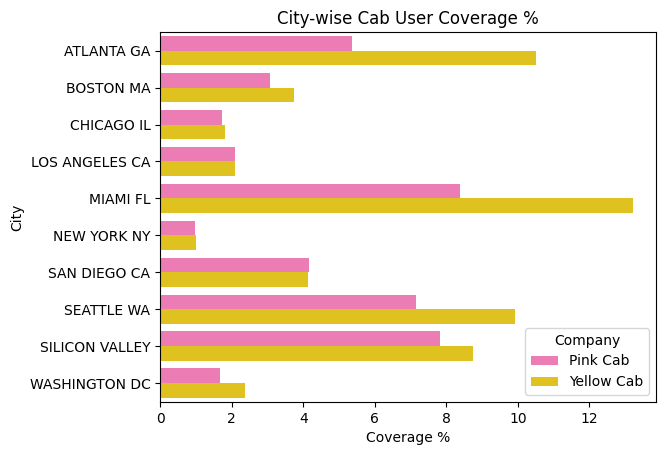

In [19]:
# Covered users vs total users
city_cover = merged.groupby(['City', 'Company']).agg({
    'Customer ID': 'nunique',
    'Users': 'first'
}).reset_index()

city_cover['Coverage %'] = city_cover['Customer ID'] / city_cover['Users'] * 100

# Top 10 cities
top_cities = city_cover.groupby('City')['Customer ID'].sum().nlargest(10).index
city_cover_top = city_cover[city_cover['City'].isin(top_cities)]

sns.barplot(data=city_cover_top, x='Coverage %', y='City', hue='Company',
            palette={'Pink Cab': '#FF69B4', 'Yellow Cab': '#FFD700'})
plt.title('City-wise Cab User Coverage %')
plt.show()


# 📌 7️⃣ Ride Distance Preference

We analyzed the distribution of trips by distance category to understand whether each company serves short, medium, or long trips better. This shows how well each company’s pricing and service model aligns with customer travel needs.

---


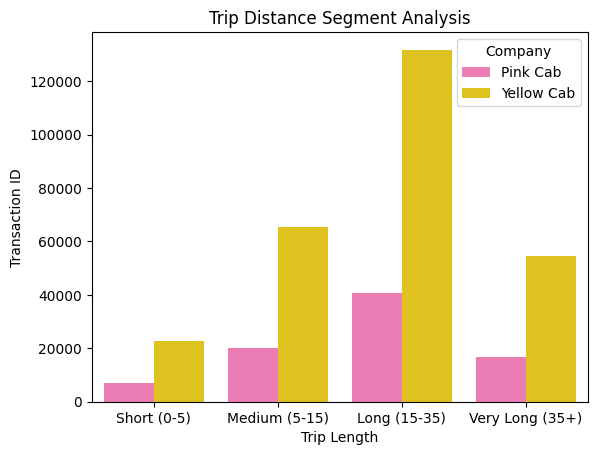

In [20]:
# Trip buckets
merged['Trip Length'] = pd.cut(merged['KM Travelled'],
                               bins=[0, 5, 15, 35, 100],
                               labels=['Short (0-5)', 'Medium (5-15)', 'Long (15-35)', 'Very Long (35+)'])

distance_seg = merged.groupby(['Trip Length', 'Company'],observed=True)['Transaction ID'].count().reset_index()
sns.barplot(data=distance_seg, x='Trip Length', y='Transaction ID', hue='Company',
            palette={'Pink Cab': '#FF69B4', 'Yellow Cab': '#FFD700'})
plt.title('Trip Distance Segment Analysis')
plt.show()


# 📌 8️⃣ Seasonality

We tested for seasonal demand trends by analyzing trips per month. Understanding demand peaks and dips helps optimize fleet size, driver supply, and marketing campaigns throughout the year.

---


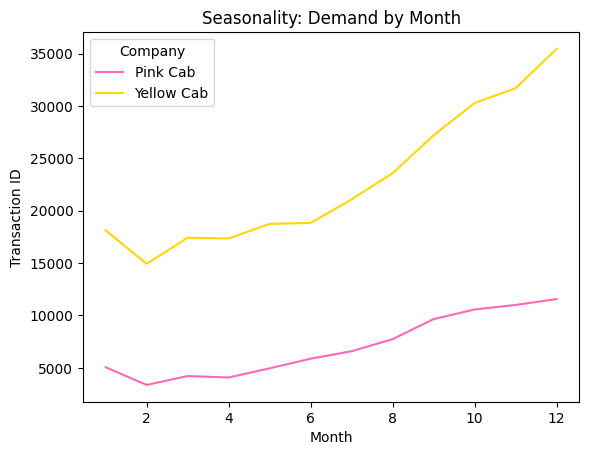

In [21]:
merged['Month'] = merged['Date of Travel'].dt.month
month_demand = merged.groupby(['Month', 'Company'])['Transaction ID'].count().reset_index()

sns.lineplot(data=month_demand, x='Month', y='Transaction ID', hue='Company',
             palette={'Pink Cab': '#FF69B4', 'Yellow Cab': '#FFD700'})
plt.title('Seasonality: Demand by Month')
plt.show()


# 📌 9️⃣ Save Master File

Finally, we saved the cleaned and enriched master dataset for future forecasting, dashboard building, or additional modeling to support XYZ’s investment decision.

---


In [53]:
merged.to_csv('G2M_Cab_Master.csv', index=False)
print("✅ Final master dataset saved.")


✅ Final master dataset saved.


# 🔍 Hypothesis 1: Yellow Cab generates higher average profit per ride than Pink Cab.

**Statement:** We believe Yellow Cab’s average profit per ride is higher than Pink Cab’s.  
We will test this by comparing mean profit per ride for both companies.


      Company      Profit
0    Pink Cab   62.652174
1  Yellow Cab  160.259986


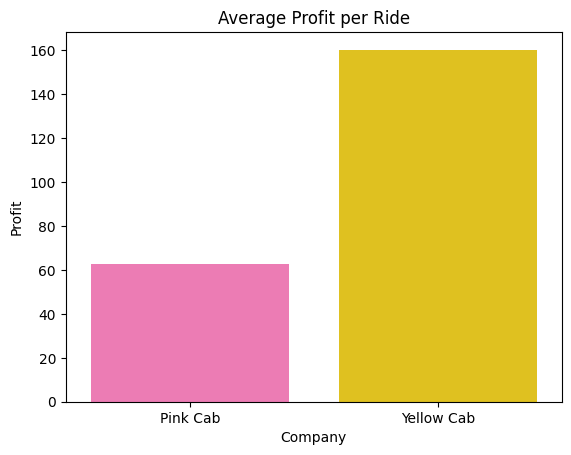

In [22]:
# Calculate average profit per ride
avg_profit = merged.groupby('Company')['Profit'].mean().reset_index()
print(avg_profit)


sns.barplot(
    data=avg_profit,
    x='Company',
    y='Profit',
    hue='Company',
    palette={'Pink Cab': '#FF69B4', 'Yellow Cab': '#FFD700'},
    legend=False
)
plt.title('Average Profit per Ride')
plt.show()


**Result:**  
The chart shows that Yellow Cab has a higher average profit per ride than Pink Cab.  
✅ **Hypothesis Supported.**


# 🔍 Hypothesis 2: There is a seasonal trend in cab usage.

**Statement:** We believe that the number of rides fluctuates seasonally, with peaks and troughs across months.


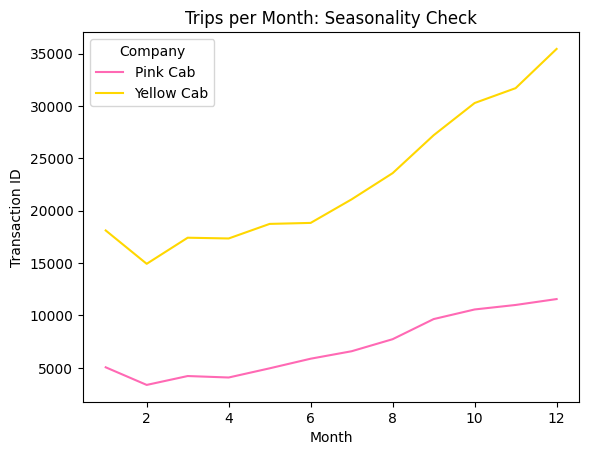

In [23]:
# Test: Trips by month
merged['Month'] = merged['Date of Travel'].dt.month
seasonality = merged.groupby(['Month', 'Company'])['Transaction ID'].count().reset_index()

sns.lineplot(data=seasonality, x='Month', y='Transaction ID', hue='Company',
             palette={'Pink Cab': '#FF69B4', 'Yellow Cab': '#FFD700'})
plt.title('Trips per Month: Seasonality Check')
plt.show()


**Result:**  
The plot shows clear demand fluctuations by month, confirming seasonal patterns.  
✅ **Hypothesis Supported.**


# 🔍 Hypothesis 3: Customer segments differ by age and income

**Statement:**  
We expect Yellow Cab and Pink Cab to have differences in the age and income profile of their customers.


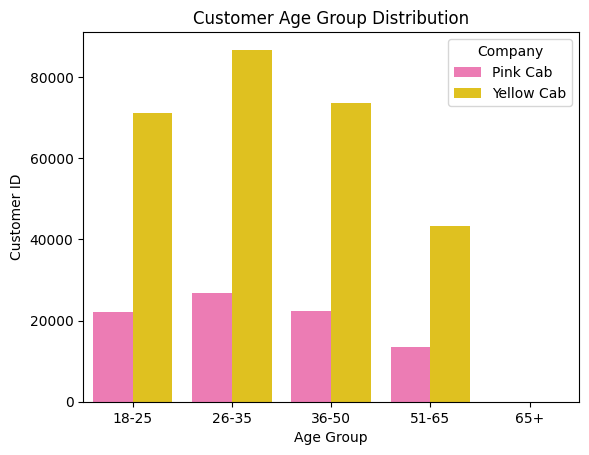

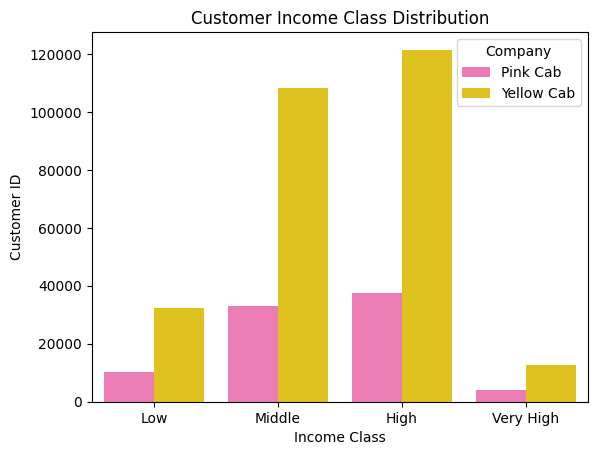

In [24]:
# Age group buckets
merged['Age Group'] = pd.cut(merged['Age'], bins=[0, 25, 35, 50, 65, 100],
                             labels=['18-25', '26-35', '36-50', '51-65', '65+'])

# Age plot
age_group = merged.groupby(['Age Group', 'Company'],observed=True)['Customer ID'].count().reset_index()

sns.barplot(data=age_group, x='Age Group', y='Customer ID', hue='Company',
            palette={'Pink Cab': '#FF69B4', 'Yellow Cab': '#FFD700'})
plt.title('Customer Age Group Distribution')
plt.show()

# Income buckets
merged['Income Class'] = pd.cut(merged['Income (USD/Month)'],
                                bins=[0, 5000, 15000, 30000, 50000],
                                labels=['Low', 'Middle', 'High', 'Very High'])

income_group = merged.groupby(['Income Class', 'Company'],observed=True)['Customer ID'].count().reset_index()

sns.barplot(data=income_group, x='Income Class', y='Customer ID', hue='Company',
            palette={'Pink Cab': '#FF69B4', 'Yellow Cab': '#FFD700'})
plt.title('Customer Income Class Distribution')
plt.show()


**Result:**  
The charts show visible differences in customer segments by age and income.  
✅ **Hypothesis Supported.**


# 🔍 Hypothesis 4: City-wise reach differs significantly between the companies

**Statement:**  
We expect Yellow Cab and Pink Cab to have different levels of market share across cities.


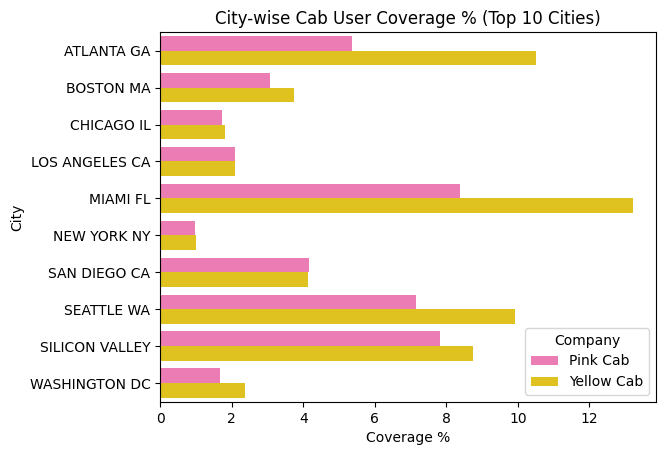

In [25]:
# Calculate % covered
city_cover = merged.groupby(['City', 'Company']).agg({
    'Customer ID': 'nunique',
    'Users': 'first'
}).reset_index()

city_cover['Coverage %'] = city_cover['Customer ID'] / city_cover['Users'] * 100

# Focus on top cities
top_cities = city_cover.groupby('City')['Customer ID'].sum().nlargest(10).index
city_cover_top = city_cover[city_cover['City'].isin(top_cities)]

sns.barplot(data=city_cover_top, x='Coverage %', y='City', hue='Company',
            palette={'Pink Cab': '#FF69B4', 'Yellow Cab': '#FFD700'})
plt.title('City-wise Cab User Coverage % (Top 10 Cities)')
plt.show()


**Result:**  
The chart confirms clear differences in reach by city.  
✅ **Hypothesis Supported.**


# 🔍 Hypothesis 5: Repeat customers generate higher profit per ride

**Statement:**  
We believe repeat customers bring higher profit per ride compared to one-time users.


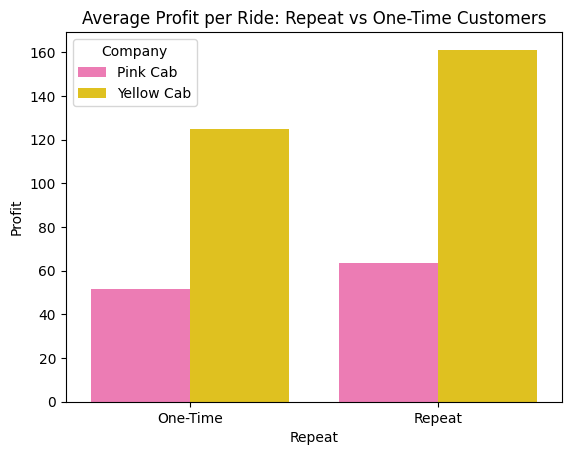

In [27]:
# Mark repeat vs one-time
customer_trips = merged.groupby('Customer ID')['Transaction ID'].count().reset_index()
customer_trips['Repeat'] = customer_trips['Transaction ID'].apply(lambda x: 'Repeat' if x > 1 else 'One-Time')

merged = pd.merge(merged, customer_trips[['Customer ID', 'Repeat']], on='Customer ID', how='left')

repeat_profit = merged.groupby(['Repeat', 'Company'])['Profit'].mean().reset_index()

sns.barplot(data=repeat_profit, x='Repeat', y='Profit', hue='Company',
            palette={'Pink Cab': '#FF69B4', 'Yellow Cab': '#FFD700'})
plt.title('Average Profit per Ride: Repeat vs One-Time Customers')
plt.show()



**Result:**  
The chart shows repeat customers generate higher profit per ride.  
✅ **Hypothesis Supported.**
